In [1]:
# Required imports

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
# Read and analyse raw data

df_orig = pd.read_csv('Alldata.csv')
df_orig.info()
df_orig.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4240 non-null   int64  
 1   Gender                   4240 non-null   int64  
 2   Age                      4240 non-null   int64  
 3   Education                4240 non-null   int64  
 4   Smoker?                  4240 non-null   int64  
 5   Cigs Per Day             4240 non-null   int64  
 6   BP Meds?                 4240 non-null   int64  
 7   Prevalent Stroke?        4240 non-null   int64  
 8   Prevalent Hypertension?  4240 non-null   int64  
 9   Diabetic?                4240 non-null   int64  
 10  Total Cholestrol         4240 non-null   int64  
 11  Systolic BP              4240 non-null   float64
 12  Diastolic BP             4240 non-null   float64
 13  BMI                      4240 non-null   float64
 14  Heart Rate              

,ID,Gender,Age,Education,Smoker?,Cigs Per Day,BP Meds?,Prevalent Stroke?,Prevalent Hypertension?,Diabetic?,Total Cholestrol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,10-Yr CHD Potential?
count,4240.0000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,2119.5000,0.429245,49.580189,1.955189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.800797,75.879009,81.966981,0.151887
std,1224.1269,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070687,12.023930,22.831751,0.358953
min,0.0000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1059.7500,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,2119.5000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,3179.2500,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,4239.0000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [3]:
# Checking for missing values. Note all corrected in the Excel File

df_orig.isna().sum()
null = df_orig[df_orig.isna().any(axis=1)]
null

,ID,Gender,Age,Education,Smoker?,Cigs Per Day,BP Meds?,Prevalent Stroke?,Prevalent Hypertension?,Diabetic?,Total Cholestrol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,10-Yr CHD Potential?


In [4]:
# Replace null values:
# Categorical variables were filled with the use of MODE
# Continuous variables (including Cigs Per Day) were filled with the use of MEAN

# Replace = df_orig['Education'].fillna(df_orig['Education'].mode()[0], inplace=True)
# Replace = df_orig['BP Meds?'].fillna(df_orig['BP Meds?'].mode()[0], inplace=True)
# Replace = df_orig['Glucose'].fillna(df_orig['Glucose'].mean(), inplace=True)
# Replace = df_orig['Total Cholestrol'].fillna(df_orig['Total Cholestrol'].mean(), inplace=True)
# Replace = df_orig['BMI'].fillna(df_orig['BMI'].mean(), inplace=True)
# Replace = df_orig['Cigs Per Day'].fillna(df_orig['Cigs Per Day'].mean(), inplace=True)
# Replace = df_orig['Heart Rate'].fillna(df_orig['Heart Rate'].mean(), inplace=True)

In [5]:
# Read and analyse pivot data

df_pvt = pd.read_csv('PVTall NoNULLs.csv')
df_pvt.info()
df_pvt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    int64  
 1   Age                      369 non-null    int64  
 2   Education                369 non-null    int64  
 3   Smoker?                  369 non-null    int64  
 4   Cigs Per Day             369 non-null    int64  
 5   BP Meds?                 369 non-null    int64  
 6   Prevalent Stroke?        369 non-null    int64  
 7   Prevalent Hypertension?  369 non-null    int64  
 8   Diabetic?                369 non-null    float64
 9   Total Cholestrol         369 non-null    float64
 10  Systolic BP              369 non-null    float64
 11  Diastolic BP             369 non-null    float64
 12  BMI                      369 non-null    float64
 13  Heart Rate               369 non-null    float64
 14  Glucose                  3

,Gender,Age,Education,Smoker?,Cigs Per Day,BP Meds?,Prevalent Stroke?,Prevalent Hypertension?,Diabetic?,Total Cholestrol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,10-Yr CHD Potential?
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.512195,15.504065,2.260163,0.861789,0.127371,0.046070,0.501355,0.135501,50.051174,240.203355,138.631370,85.492107,25.904574,76.963277,91.076130,0.002724
std,0.500530,14.452531,1.107073,0.345590,0.333841,0.209922,0.500677,0.342723,6.667101,35.186814,22.023734,11.277630,3.274563,9.574107,41.081168,0.007233
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,155.000000,96.000000,55.000000,17.610000,50.000000,53.000000,0.000000
25%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.185185,220.000000,121.136986,76.553571,23.852727,72.000000,76.666667,0.000000
50%,1.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000,236.937500,133.000000,83.666667,25.506667,75.833333,80.250000,0.000000
75%,1.000000,23.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.647059,255.000000,153.551471,94.000000,27.656667,81.500000,85.000000,0.001600
max,1.000000,70.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,439.000000,215.000000,124.000000,38.960000,122.000000,368.000000,0.087000


In [6]:
# Test histogram plotting

# data = np.random.default_rng(123).rayleigh(1, 70)
# counts, edges, bars = plt.hist(data)
# plt.bar_label(bars)

In [1]:
# Raw data distribution using histograms
# Dataset highly skewed because of many 0's in the dependent variable

# Method 1
df_orig.drop(['ID'], axis = 1, inplace=True)
figure = plt.figure(figsize = (30,50))
ax = figure.gca()
df_orig.hist(ax = ax, edgecolor='black')

# Method 2 with bar values
# for row in df_orig:
#     plt.figure(figsize=(5, 5))
#     values, bins, bars = plt.hist(df_orig[row], edgecolor='black')
#     plt.xlabel(row)
#     plt.ylabel("Count")
#     #plt.title = (row)
#     #print(plt.bar_label(bars))
#     plt.bar_label(bars, fontsize=10, color='black')
#     plt.margins(x=0.01, y=0.1)
#     plt.show()

NameError: name 'plt' is not defined

['Gender', 'Age', 'Education', 'Smoker?', 'Cigs Per Day', 'BP Meds?', 'Prevalent Stroke?', 'Prevalent Hypertension?', 'Diabetic?', 'Total Cholestrol', 'Systolic BP', 'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose', '10-Yr CHD Potential?']


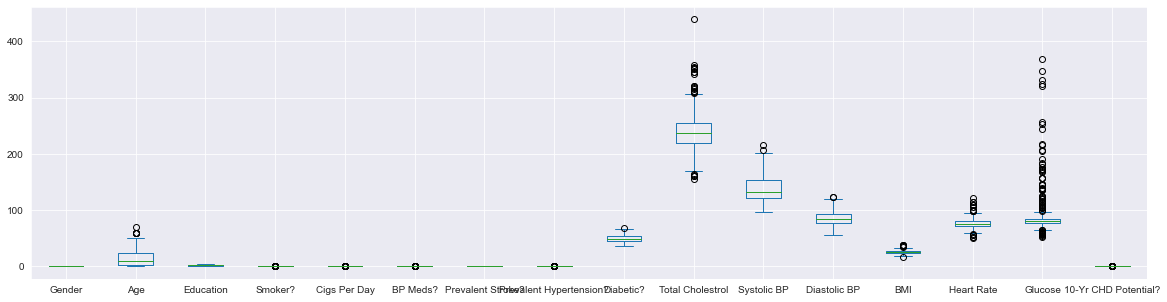

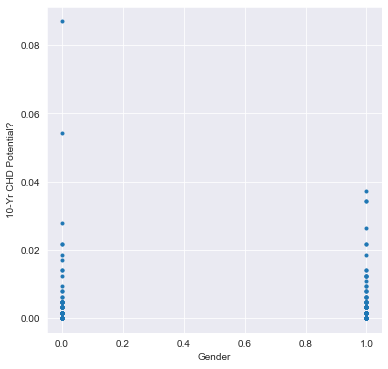

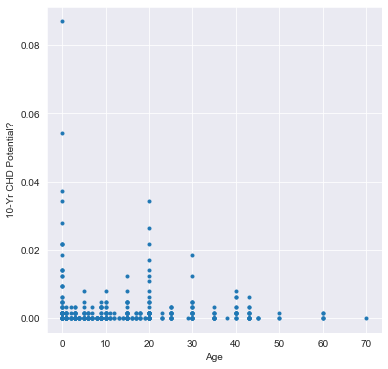

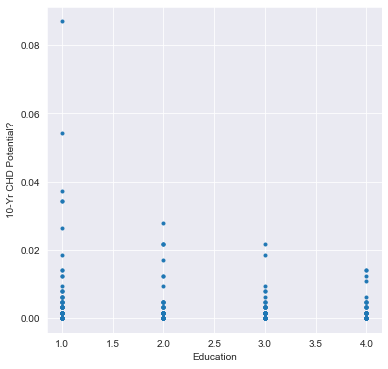

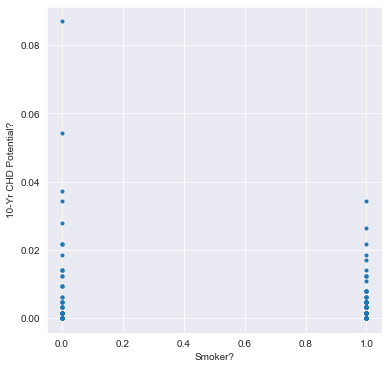

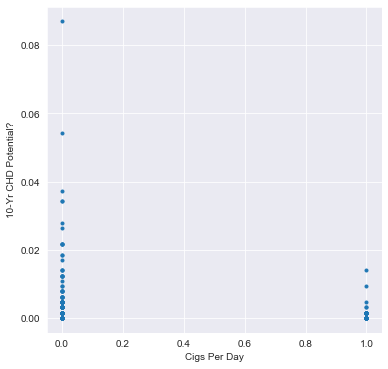

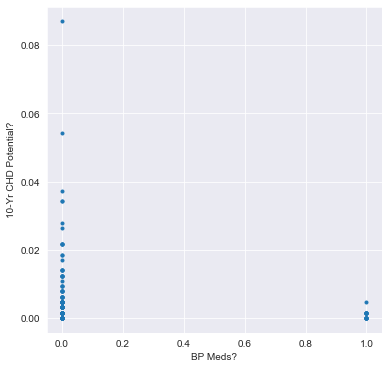

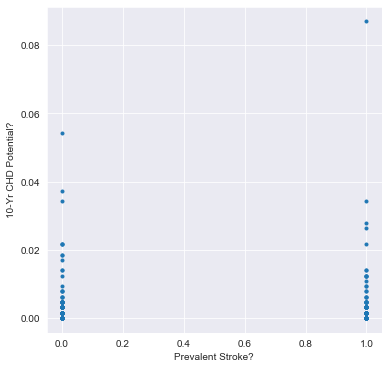

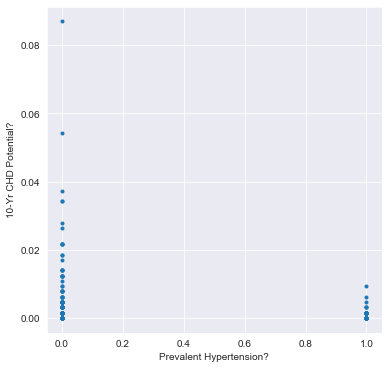

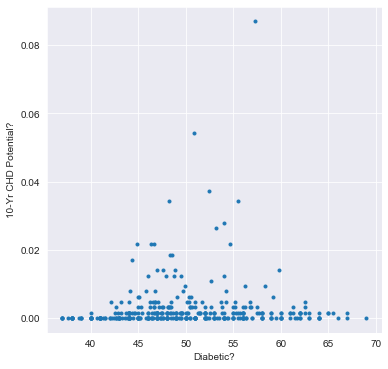

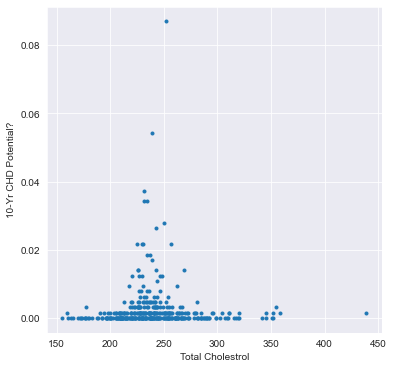

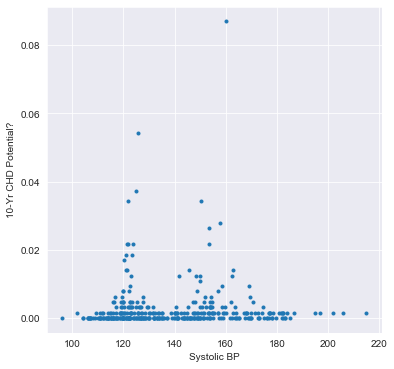

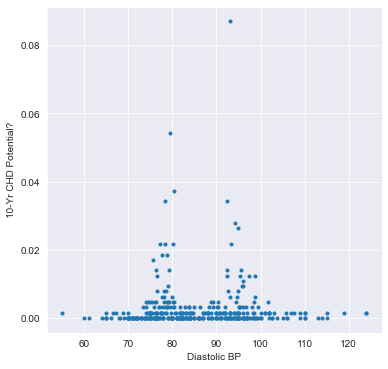

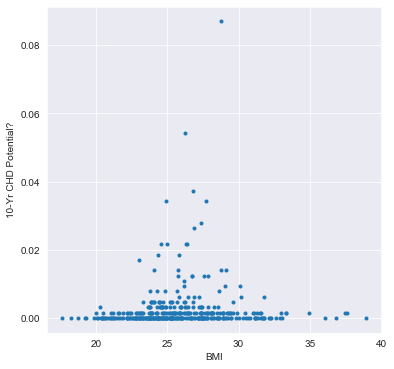

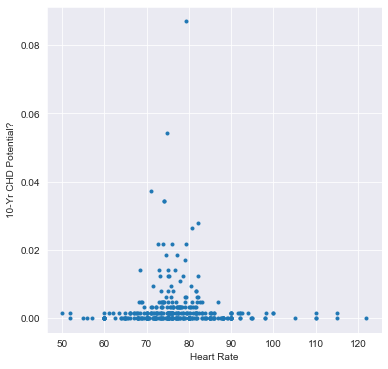

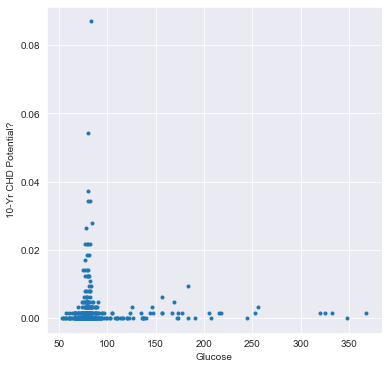

In [8]:
# Scatter plots of cases distribution of all independent variables against the dependent variable

LoV = list(df_pvt)
print(LoV)

plt.rcParams['figure.figsize'] = (20, 10)
df_pvt.plot(kind='box')

figures = []  
for i in df_pvt:
    if i == '10-Yr CHD Potential?': break
    f = plt.figure(figsize=(6,6))
    figures += [f]
    ax = plt.axes()
    ax.set_xlabel(i)
    ax.set_ylabel('10-Yr CHD Potential?')
    plt.plot(df_pvt[i], df_pvt['10-Yr CHD Potential?'], marker = 'o', ls='', ms = 3.0)
    plt.show()

In [9]:
# Retrieve IQR

Q1 = df_pvt.quantile(0.25)
Q3 = df_pvt.quantile(0.75)
IQR = Q3 - Q1
IQR

Gender                      1.000000
Age                        20.000000
Education                   2.000000
Smoker?                     0.000000
Cigs Per Day                0.000000
BP Meds?                    0.000000
Prevalent Stroke?           1.000000
Prevalent Hypertension?     0.000000
Diabetic?                   9.461874
Total Cholestrol           35.000000
Systolic BP                32.414484
Diastolic BP               17.446429
BMI                         3.803939
Heart Rate                  9.500000
Glucose                     8.333333
10-Yr CHD Potential?        0.001600
dtype: float64

In [10]:
# Skipping outliers analysis as its deemed unrelevant in this case

# columns = list(IQR.index)
# Lower_Limit = Q1 - 1.5 * IQR
# Upper_Limit = Q3 + 1.5 * IQR
# df_outliers = df_pvt[((df_pvt[columns]<Lower_Limit) | (df_pvt[columns]>Upper_Limit)).any(axis=1)]
# df_outliers.info()
# df_NO_outliers = df_pvt[~((df_pvt[columns]<Lower_Limit) | (df_pvt[columns]>Upper_Limit)).any(axis=1)]
# df_NO_outliers.info()

In [11]:
# Plotting the box graph with no outliers

# df_NO_outliers.plot(kind='box')
# plt.show()
# df_NO_outliers.plot(column=['Gender', 'Age', 'Education', 'Smoker?', 'Cigs Per Day','BP Meds?',\
#                             'Prevalent Stroke?', 'Prevalent Hypertension?', 'Diabetic?', 'Total Cholestrol',\
#                             'Systolic BP', 'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose'], kind='box')
# plt.show()

In [12]:
# Plotting the box graph of outliers values

# df_outliers.plot(kind='box')
# plt.show()
# df_outliers.plot(column=['Gender', 'Age', 'Education', 'Smoker?', 'Cigs Per Day','BP Meds?',\
#                          'Prevalent Stroke?', 'Prevalent Hypertension?', 'Diabetic?', 'Total Cholestrol',\
#                          'Systolic BP', 'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose'], kind='box')
# plt.show()

<AxesSubplot:>

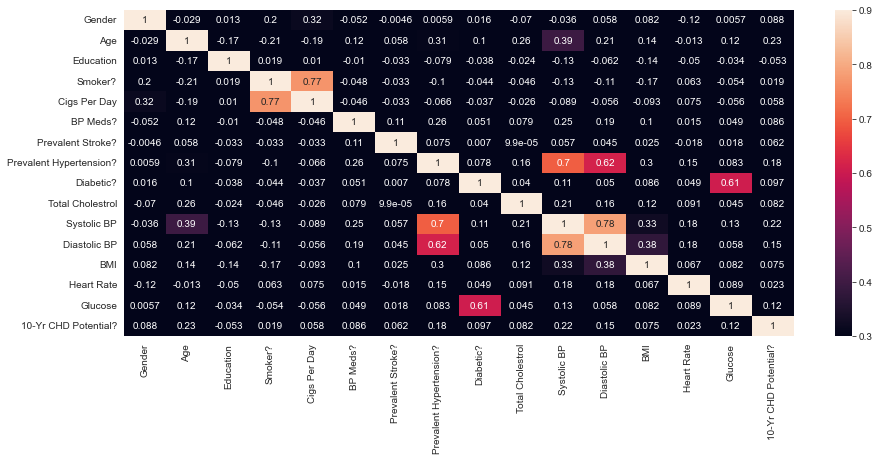

In [79]:
# Heatmap of raw data correlations

df_orig = pd.read_csv('Alldata.csv')
df_orig.drop(['ID'], axis = 1, inplace=True)
df_orig_corr = df_orig.corr(method="pearson", min_periods=1)

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_orig_corr, vmin = 0.3, vmax = 0.9, annot = True)

<AxesSubplot:>

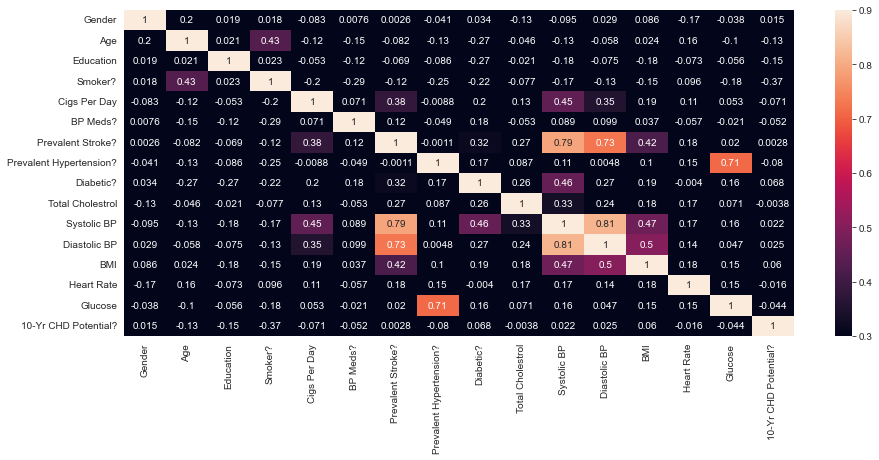

In [80]:
# Heatmap of pivot data
# Looking for variables with a correlation between 0.3 and 0.9 (or the opposite on the negative side)

df_pvt = pd.read_csv('PVTall NoNULLs.csv')
#LoV = list(df_all)
#print(LoV)

fig, ax = plt.subplots(figsize=(15,6))
df_corr = df_pvt.corr(method="pearson", min_periods=1)
sns.heatmap(df_corr, vmin = 0.3, vmax = 0.9, annot = True)
#df_corr

In [15]:
# Regression analysis across all independent variables
# looking for significant co-effecients with p<0.05 
# with a confidence interval not to include 0 (otherwise variable is not statistically significant)
# regression is not very strong because of many 0's in the dependent variable

df_pvt = pd.read_csv('PVTall NoNULLs.csv')
#LoV = list(df_pvt)
#print(LoV)
indp_vars_list = ['Gender', 'Age', 'Education', 'Smoker?', 'Cigs Per Day', 'BP Meds?', 'Prevalent Stroke?',\
                  'Prevalent Hypertension?', 'Diabetic?', 'Total Cholestrol', 'Systolic BP', 'Diastolic BP',\
                  'BMI', 'Heart Rate', 'Glucose']
indpt_vars = df_pvt[indp_vars_list]
depnt_vars = df_pvt['10-Yr CHD Potential?']
indpt_vars = sm.add_constant(indpt_vars)
regression_model = sm.OLS(depnt_vars,indpt_vars).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     10-Yr CHD Potential?   R-squared:                       0.280
Model:                              OLS   Adj. R-squared:                  0.250
Method:                   Least Squares   F-statistic:                     9.163
Date:                  Sat, 22 Oct 2022   Prob (F-statistic):           4.33e-18
Time:                          21:52:43   Log-Likelihood:                 1356.4
No. Observations:                   369   AIC:                            -2681.
Df Residuals:                       353   BIC:                            -2618.
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0109      0.006      1.880      0.061      -0.001       0.022
Gender                   7.382e-05      0.001      0.103      0.918      -0.001       0.001
Age                      1.084e-05   2.69e-05      0.403      0.688   -4.21e-05    6.38e-05
Education                  -0.0012      0.000     -3.788      0.000      -0.002      -0.001
Smoker?                    -0.0116      0.001    -10.017      0.000      -0.014      -0.009
Cigs Per Day               -0.0042      0.001     -3.734      0.000      -0.006      -0.002
BP Meds?                   -0.0081      0.002     -4.820      0.000      -0.011      -0.005
Prevalent Stroke?       -2.034e-05      0.001     -0.018      0.986      -0.002       0.002
Prevalent Hypertension?    -0.0062      0.001     -4.354      0.000      -0.009      -0.003
Diabetic?                4.178e-05   6.18e-05      0.676      0.499   -7.97e-05       0.000
Total Cholestrol        -7.612e-06   1.02e-05     -0.748      0.455   -2.76e-05    1.24e-05
Systolic BP             -5.438e-06   3.54e-05     -0.154      0.878    -7.5e-05    6.41e-05
Diastolic BP              2.94e-05   5.52e-05      0.533      0.594   -7.91e-05       0.000
BMI                     -3.668e-05      0.000     -0.302      0.763      -0.000       0.000
Heart Rate               5.489e-05   3.75e-05      1.462      0.145   -1.89e-05       0.000
Glucose                  8.238e-06   1.16e-05      0.712      0.477   -1.45e-05     3.1e-05
==============================================================================
Omnibus:                      456.983   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46119.950
Skew:                           5.661   Prob(JB):                         0.00
Kurtosis:                      56.586   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
# Regressive Coefficients of independent variable plot

plt.rcParams['figure.figsize'] = (20, 10)
regression_model.params.sort_values(ascending=True)\
.plot(kind='bar',title="Regressive Coefficients for dependent variable: 10-Yr CHD Potential?")

NameError: name 'plt' is not defined

In [17]:
# Regression analysis across chosen independent variables based on regression results

df_pvt = pd.read_csv('PVTall NoNULLs.csv')
indp_vars_list = ['Smoker?', 'Education', 'Cigs Per Day', 'BP Meds?', 'Prevalent Hypertension?']
indpt_vars = df_pvt[indp_vars_list]
depnt_vars = df_pvt['10-Yr CHD Potential?']
indpt_vars = sm.add_constant(indpt_vars)
regression_model = sm.OLS(depnt_vars,indpt_vars).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     10-Yr CHD Potential?   R-squared:                       0.272
Model:                              OLS   Adj. R-squared:                  0.262
Method:                   Least Squares   F-statistic:                     27.09
Date:                  Sat, 22 Oct 2022   Prob (F-statistic):           2.73e-23
Time:                          21:52:43   Log-Likelihood:                 1354.2
No. Observations:                   369   AIC:                            -2696.
Df Residuals:                       363   BIC:                            -2673.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0167      0.001     12.962      0.000       0.014       0.019
Smoker?                    -0.0111      0.001    -10.704      0.000      -0.013      -0.009
Education                  -0.0013      0.000     -4.246      0.000      -0.002      -0.001
Cigs Per Day               -0.0038      0.001     -3.798      0.000      -0.006      -0.002
BP Meds?                   -0.0078      0.002     -4.777      0.000      -0.011      -0.005
Prevalent Hypertension?    -0.0052      0.001     -5.204      0.000      -0.007      -0.003
==============================================================================
Omnibus:                      457.851   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46471.479
Skew:                           5.678   Prob(JB):                         0.00
Kurtosis:                      56.792   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'Regressive Coefficients for Sum of TenYearCHD'}>

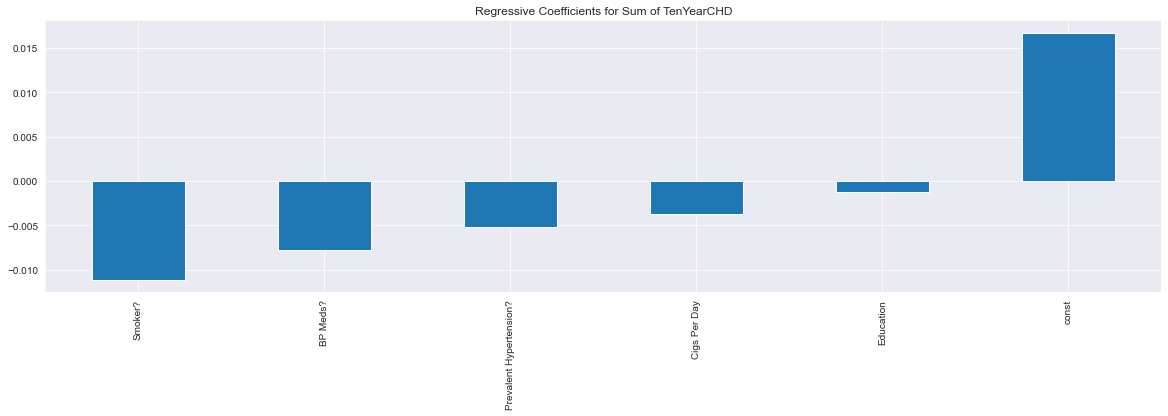

In [18]:
# Regressive Coefficients of chosen independent variables plot

plt.rcParams['figure.figsize'] = (20, 10)
regression_model.params.sort_values(ascending=True).\
plot(kind='bar',title="Regressive Coefficients for Sum of TenYearCHD")

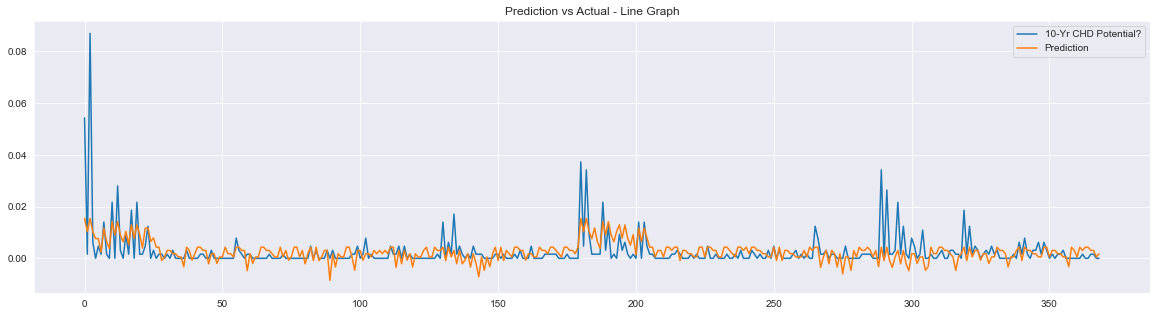

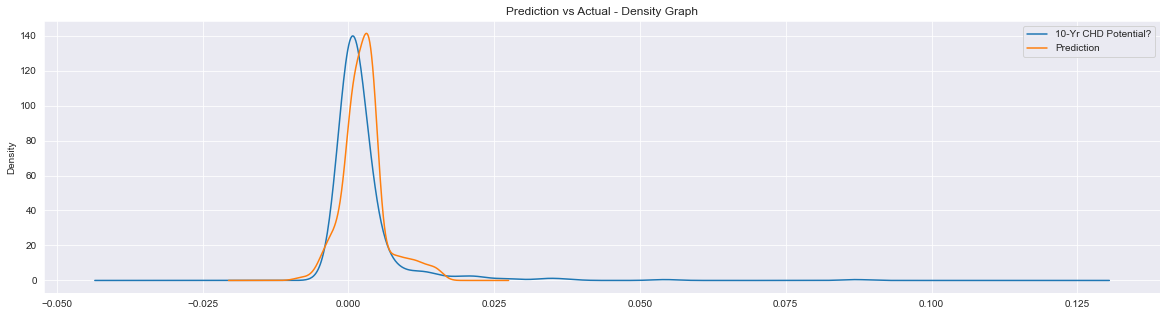

In [19]:
# Predict independent variables based on the findings so far and plotting actuals against prediction

plt.rcParams['figure.figsize'] = (20, 10)
df_pvt = pd.read_csv('PVTall NoNULLs.csv')
df_pvt['Prediction'] = regression_model.predict(indpt_vars)
plot = df_pvt[['10-Yr CHD Potential?', 'Prediction']].plot(kind='line', title='Prediction vs Actual - Line Graph')
plot = df_pvt[['10-Yr CHD Potential?', 'Prediction']].plot(kind='density', title='Prediction vs Actual - Density Graph')
#df_pvt[['10-Yr CHD Potential?', 'Prediction']]

Adding Some more Relevant Charts to enhance Visuals
Plottin 10-Yr CHD Potential? with the 5 chosen independent variables:
1. Smoker?
2. Education
3. Cigs Per Day
4. BP Meds?
5. Prevalent Hypertension?

Text(0.5, 1.0, 'Age distribution with 10-Yr CHD Potential')

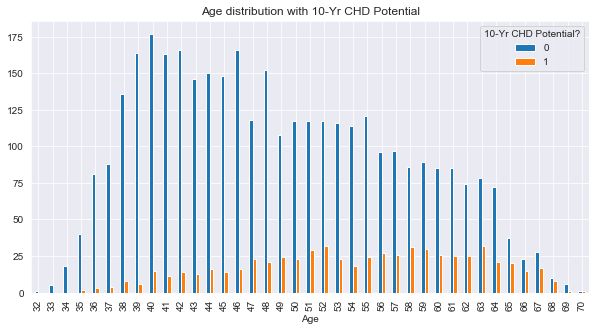

In [69]:
df_orig = pd.read_csv('Alldata.csv')

plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['Age','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Age distribution with 10-Yr CHD Potential')

Text(0.5, 1.0, 'Education distribution with 10-Yr CHD Potential')

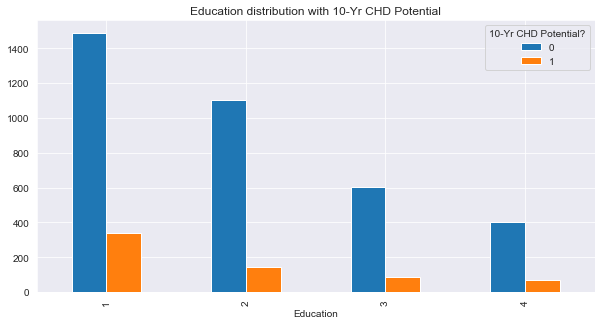

In [70]:
plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['Education','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Education distribution with 10-Yr CHD Potential')

Text(0.5, 1.0, 'Smokers distribution with 10-Yr CHD Potential')

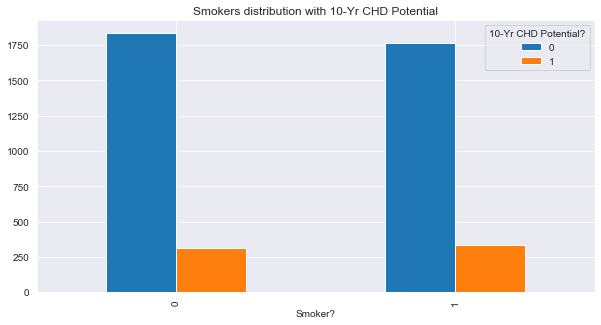

In [71]:
plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['Smoker?','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Smokers distribution with 10-Yr CHD Potential')

Text(0.5, 1.0, 'Cigarettes per day (for smokers only) distribution with 10-Yr CHD Potential')

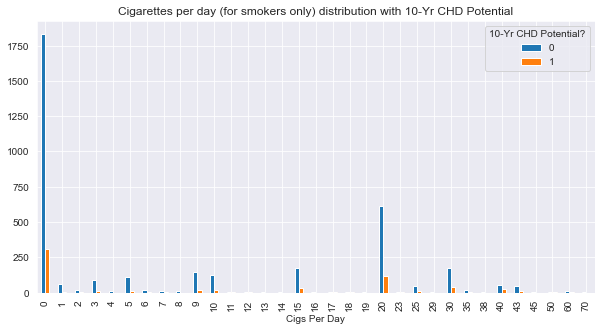

In [72]:
plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['Cigs Per Day','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Cigarettes per day (for smokers only) distribution with 10-Yr CHD Potential')

Text(0.5, 1.0, 'Cases with BP medication distribution with 10-Yr CHD Potential')

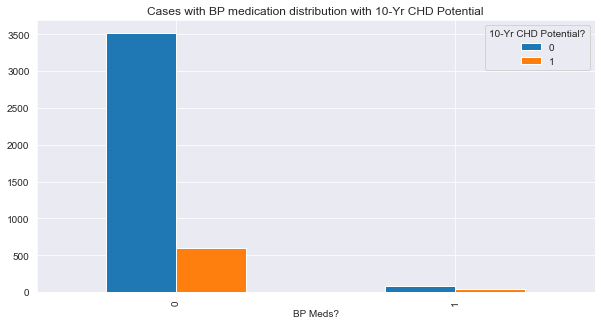

In [73]:
plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['BP Meds?','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Cases with BP medication distribution with 10-Yr CHD Potential')

Text(0.5, 1.0, 'Cases with prevalent hypertension distribution with 10-Yr CHD Potential')

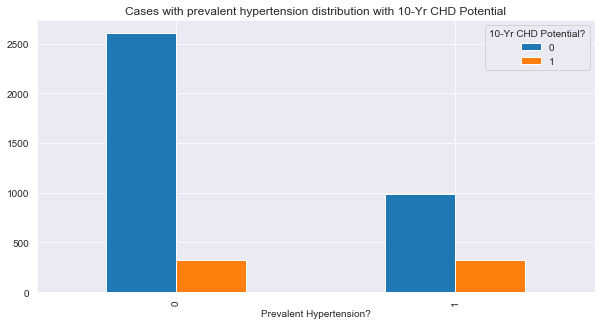

In [75]:
plt.rcParams['figure.figsize'] = (20, 10)
df_orig.groupby(['Prevalent Hypertension?','10-Yr CHD Potential?'])['ID'].count().unstack().plot(kind='bar')
plt.title('Cases with prevalent hypertension distribution with 10-Yr CHD Potential')